# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18773731,
            "id": 1,
            "last_updated": 1627873450,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 748927014741,
                    "percent_change_1h": 0.598907974296136,
                    "percent_change_24h": -4.65063431077564,
                    "percent_change_7d": 12.5165747486548,
                    "percentage_change_1h": 0.598907974296136,
                    "percentage_change_24h": -4.65063431077564,
                    "percentage_change_7d": 12.5165747486548,
                    "price": 39894.0,
                    "volume_24h": 29206139661
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18773731,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 116935561,
            "id": 1027,
            "last_updated": 1627873442,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 300483949900,
                    "percent_change_1h": 1.2098474798117,
                    "percent_change_24h": -0.457813400984689,
                    "percent_change_7d": 16.3485927273161,
                    "percentage_change_1h": 1.2098474798117,
                    "percentage_change_24h": -0.457813400984689,
                    "percentage_change_7d": 16.3485927273161,
                    "price": 2570.72,
                    "volume_24h": 26501708433
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 116935561,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = float(btc_response['data']['1']['quotes']['USD']['price'])

## turned into float to only show the price 
# Print the current price of BTC
# YOUR CODE HERE
print("The current price of Bitcoin is", btc_price)

The current price of Bitcoin is 39894.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = float(eth_response['data']['1027']['quotes']['USD']['price'])

## turned into float to only show the price 
# Print the current price of ETH
# YOUR CODE HERE
print("The current price of Etherium is", eth_price)

The current price of Etherium is 2570.72


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [49]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
# YOUR CODE HERE
print("The Bitcoin in this wallet is worth", btc_value )

The Bitcoin in this wallet is worth 47872.799999999996


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
# YOUR CODE HERE
print("The Etherium in this wallet is worth", eth_value)

The Etherium in this wallet is worth 13624.815999999999


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print("The total value of the wallet is", total_crypto_wallet)

The total value of the wallet is 61497.615999999995


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")




# Create the Alpaca tradeapi.REST object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

df_portfolio.index = df_portfolio.index.date
# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
df_portfolio.head()

AGG                                        SPY                 \
              open    high      low    close   volume    open    high    low   
2020-08-07  119.66  119.73  119.395  119.445  8830420  333.28  334.88  332.3   

                              
             close    volume  
2020-08-07  334.55  98710236

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number

agg_close_price = float(df_portfolio["AGG"]["close"])

## turned into float to only show the price 

# Print the AGG closing price
# YOUR CODE HERE
print(agg_close_price)

119.445


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(df_portfolio["SPY"]["close"])

## turned into float to only show the price 

# Print the SPY closing price
# YOUR CODE HERE
print(spy_close_price)

334.55


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
# YOUR CODE HERE
print("The current value of AGG held is", agg_value)

The current value of AGG held is 23889.0


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
# YOUR CODE HERE
print("The current value of SPY held is", spy_value)

The current value of SPY held is 36800.5


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
print("The total value of the portfolio is", total_stocks_bonds)

The total value of the portfolio is 60689.5


In [52]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"The total value of crypto and stocks and bonds is", total_portfolio )


The total value of crypto and stocks and bonds is 122187.116


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet , total_stocks_bonds]

# Review the Python list savings_data
# YOUR CODE HERE
print(savings_data)
    

[61497.615999999995, 60689.5]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    savings_data, 
    columns = ["amount"], 
    index = ["crypto", "stock/bond"]
)

# Display the savings_df DataFrame
# YOUR CODE HERE
savings_df.head()

,amount
crypto,61497.616
stock/bond,60689.500


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='amount'>

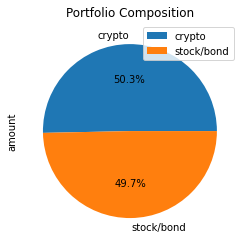

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
savings_df.plot.pie(y="amount", title = "Portfolio Composition", autopct="%1.1f%%")

## added autopercent to make the pie chart more meaningful

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3*monthly_income

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if (total_portfolio > emergency_fund_value):
    print("Congratulations, you have enough money for an emergency fund!")
elif [total_portfolio == emergency_fund_value]:
        print("You made it to an important financial goal!")
else:
        print("You do not have enough for the emergency fund, you require", total_portfolio - emergency_fund_value)


Congratulations, you have enough money for an emergency fund!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
new_start_date = pd.Timestamp("2017-08-07", tz="America/New_York").isoformat()
new_end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [29]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
montecarlo_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=new_start_date,
  end=new_end_date,
  limit=limit_rows
).df


# Display both the first and last five rows of the DataFrame
montecarlo_df.head()
montecarlo_df.tail()


AGG                                         \
                             open    high       low    close      volume   
time                                                                       
2020-08-03 00:00:00-04:00  119.37  119.40  119.1903  119.400  17837420.0   
2020-08-04 00:00:00-04:00  119.42  119.63  119.4200  119.630  21512268.0   
2020-08-05 00:00:00-04:00  119.39  119.49  119.3100  119.400  34175883.0   
2020-08-06 00:00:00-04:00  119.62  119.73  119.5300  119.580   9009216.0   
2020-08-07 00:00:00-04:00  119.66  119.73  119.3950  119.445   8830420.0   

                                SPY                                    
                               open    high     low   close    volume  
time                                                                   
2020-08-03 00:00:00-04:00  328.3200  329.62  327.73  328.76  71741125  
2020-08-04 00:00:00-04:00  327.8600  330.06  327.86  330.03  73684427  
2020-08-05 00:00:00-04:00  331.4700  332.39  331.18  332.06  72846458  
2020-08-06 00:00:00-04:00  331.4799  334.46  331.13  334.31  76900649  
2020-08-07 00:00:00-04:00  333.2800  334.88  332.30  334.55  98710236

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirtyyear = MCSimulation(
  portfolio_data = montecarlo_df,
  weights = [.60,.40],
  num_simulation = 500,
  num_trading_days = 252*30
)

# Review the simulation input data
MC_thirtyyear.portfolio_data.describe()


AGG                                                    \
             open        high         low       close        volume   
count  756.000000  756.000000  756.000000  756.000000  7.560000e+02   
mean   110.029328  110.166699  109.869408  110.026943  4.521761e+06   
std      4.036820    4.057172    3.995927    4.029469  4.623420e+06   
min    104.070000  104.169900  103.940000  104.005000  1.000706e+06   
25%    106.540000  106.645000  106.387750  106.498750  2.200958e+06   
50%    109.265000  109.415000  109.144250  109.297500  2.956928e+06   
75%    112.842500  112.941475  112.620000  112.800000  4.955643e+06   
max    119.660000  119.730000  119.530000  119.630000  4.357488e+07   

                           SPY                                      \
      daily_return        open        high         low       close   
count   756.000000  757.000000  757.000000  757.000000  757.000000   
mean      0.000119  283.022729  284.632296  281.201521  283.048053   
std       0.003505   22.197433   22.023795   22.422057   22.211722   
min      -0.040343  228.190000  229.683300  218.260000  222.510000   
25%      -0.001091  267.510000  268.600000  265.490000  267.220000   
50%       0.000188  280.740000  282.560000  279.360000  281.020000   
75%       0.001315  296.270000  297.892000  294.330000  296.260000   
max       0.027948  337.790000  339.080000  337.480000  338.310000   

                                  
             volume daily_return  
count  7.570000e+02   756.000000  
mean   6.962899e+07     0.000498  
std    4.603142e+07     0.014154  
min    1.606768e+07    -0.116340  
25%    4.208117e+07    -0.003415  
50%    5.517814e+07     0.000935  
75%    7.929204e+07     0.006161  
max    3.466706e+08     0.094737

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993870,1.003944,1.001773,0.999329,0.997377,1.005081,0.996599,0.995202,1.019397,1.002159,...,1.003525,0.990068,0.986680,0.994617,0.997522,1.004950,0.996661,1.001813,1.003356,0.998491
2,1.004682,0.998220,1.005134,1.006202,0.998197,1.010289,0.987936,1.002088,1.016445,1.000762,...,0.989022,0.987477,0.991384,1.009121,0.998615,1.006589,1.011270,0.993399,1.005739,0.996881
3,0.992644,1.002979,1.010763,1.009523,1.002725,1.011789,0.979654,1.005429,1.022336,1.003739,...,0.988026,0.982288,0.991974,1.011215,1.000283,1.009124,1.020350,0.997219,1.009341,0.998546
4,0.991440,1.004525,1.013735,0.999438,0.996583,1.020235,0.976040,1.000341,1.025901,1.001194,...,0.984346,0.988130,0.986636,1.004032,1.001346,1.007155,1.017277,0.991614,1.009681,1.007426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.667739,5.174439,8.134995,7.488486,2.656625,8.307977,8.237394,3.868824,8.068821,11.342010,...,10.658672,4.666550,5.102731,16.803213,3.335722,7.568873,8.423506,8.444204,5.150511,30.107656
7557,7.583503,5.162898,8.156128,7.404887,2.655855,8.299988,8.278171,3.850843,8.126902,11.342157,...,10.720204,4.668442,5.141365,16.966517,3.338055,7.626322,8.409214,8.366080,5.119620,29.873868
7558,7.496652,5.138435,8.191750,7.432571,2.642845,8.385056,8.292626,3.833808,8.043425,11.329469,...,10.706354,4.669740,5.161299,16.983909,3.335950,7.678804,8.388983,8.282064,5.107159,29.490698
7559,7.502088,5.081017,8.313429,7.454518,2.632509,8.406655,8.256007,3.804565,8.098386,11.415666,...,10.711902,4.712054,5.180661,16.921615,3.327295,7.675150,8.475270,8.261616,5.128240,29.342046


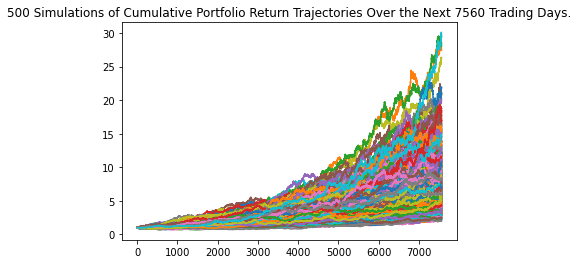

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_thirtyyear.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

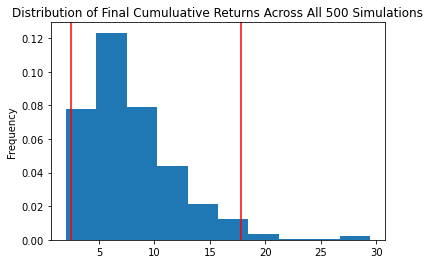

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_thirtyyear.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_thirtyyear.summarize_cumulative_return()



# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              7.918914
std               4.222118
min               2.004839
25%               5.006954
50%               7.016907
75%               9.876259
max              29.440057
95% CI Lower      2.499010
95% CI Upper     17.812781
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)


60689.5


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of", total_stocks_bonds, "in the portfolio"
  f" over the next 30 years will end within in the range of"
  f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")


## put to only two decimal places for easier reading 

There is a 95% chance that an initial investment of 60689.5 in the portfolio over the next 30 years will end within in the range of $ 151663.66 and $ 1081048.79.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_tenyear = MCSimulation(
  portfolio_data = montecarlo_df,
  weights = [.80,.20],
  num_simulation = 500,
  num_trading_days = 252*10
)

# Review the simulation input data
MC_tenyear.portfolio_data.describe()


AGG                                                    \
             open        high         low       close        volume   
count  756.000000  756.000000  756.000000  756.000000  7.560000e+02   
mean   110.029328  110.166699  109.869408  110.026943  4.521761e+06   
std      4.036820    4.057172    3.995927    4.029469  4.623420e+06   
min    104.070000  104.169900  103.940000  104.005000  1.000706e+06   
25%    106.540000  106.645000  106.387750  106.498750  2.200958e+06   
50%    109.265000  109.415000  109.144250  109.297500  2.956928e+06   
75%    112.842500  112.941475  112.620000  112.800000  4.955643e+06   
max    119.660000  119.730000  119.530000  119.630000  4.357488e+07   

                           SPY                                      \
      daily_return        open        high         low       close   
count   756.000000  757.000000  757.000000  757.000000  757.000000   
mean      0.000119  283.022729  284.632296  281.201521  283.048053   
std       0.003505   22.197433   22.023795   22.422057   22.211722   
min      -0.040343  228.190000  229.683300  218.260000  222.510000   
25%      -0.001091  267.510000  268.600000  265.490000  267.220000   
50%       0.000188  280.740000  282.560000  279.360000  281.020000   
75%       0.001315  296.270000  297.892000  294.330000  296.260000   
max       0.027948  337.790000  339.080000  337.480000  338.310000   

                                  
             volume daily_return  
count  7.570000e+02   756.000000  
mean   6.962899e+07     0.000498  
std    4.603142e+07     0.014154  
min    1.606768e+07    -0.116340  
25%    4.208117e+07    -0.003415  
50%    5.517814e+07     0.000935  
75%    7.929204e+07     0.006161  
max    3.466706e+08     0.094737

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004520,0.993595,0.994930,1.005032,0.997677,0.993374,0.997037,0.997503,1.000366,0.998428,...,1.003239,1.009018,0.994067,1.002353,1.000193,1.002061,0.994499,1.008909,1.000484,1.002930
2,1.006250,0.989140,0.995212,1.004011,0.998038,0.993760,0.989774,0.999042,1.000180,0.994240,...,1.005609,1.009221,0.990831,0.997438,1.003904,0.997159,0.999489,1.006549,1.004517,1.007507
3,1.003238,0.990489,0.995639,0.998244,0.995429,0.986121,0.990063,1.002216,1.001320,0.998194,...,1.009017,1.011211,0.991421,0.995148,1.002182,0.992152,1.004966,1.004867,0.999127,1.010316
4,1.007189,0.993687,1.002783,1.003809,0.990145,0.984086,0.993167,1.000269,1.002360,0.999056,...,1.010196,1.011087,0.988819,0.992058,1.001443,0.989255,1.004259,1.007027,1.001076,1.005442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.832357,1.521673,2.182972,1.285510,1.341628,1.440254,1.422802,1.787186,1.973343,1.697941,...,1.621682,2.387908,1.386854,1.345188,1.337716,1.867234,1.611573,1.894274,1.617222,3.054721
2517,1.830187,1.517654,2.189296,1.286035,1.338646,1.439604,1.426066,1.791207,1.963518,1.696611,...,1.623586,2.390641,1.383041,1.348279,1.337277,1.868554,1.607484,1.898271,1.614179,3.063879
2518,1.851416,1.517764,2.205355,1.284756,1.339971,1.435619,1.419376,1.790402,1.966476,1.690866,...,1.625227,2.396691,1.383371,1.348558,1.341156,1.871898,1.606103,1.901800,1.604572,3.064325
2519,1.844189,1.507175,2.210386,1.278590,1.334641,1.443194,1.413611,1.789578,1.971205,1.688180,...,1.622060,2.412875,1.397028,1.340553,1.346919,1.859484,1.607867,1.896929,1.595418,3.043743


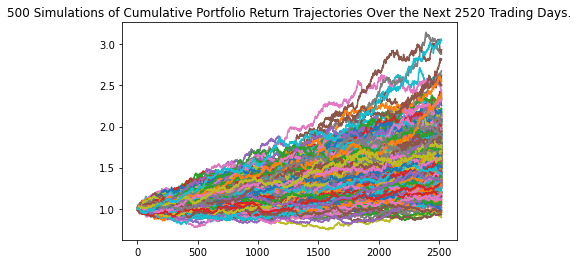

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_tenyear.plot_simulation()


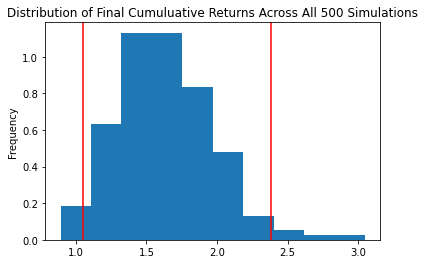

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_tenyear.plot_distribution()


In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics_ten = MC_tenyear.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_summary_statistics_ten)

count           500.000000
mean              1.636519
std               0.341373
min               0.892001
25%               1.387400
50%               1.607401
75%               1.834757
max               3.046897
95% CI Lower      1.050974
95% CI Upper      2.384958
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)


60689.5


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_summary_statistics_ten[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_summary_statistics_ten[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of", total_stocks_bonds, "in the portfolio"
  f" over the next 10 years will end within in the range of"
  f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")

## put to only two decimal places for easier reading 


There is a 95% chance that an initial investment of 60689.5 in the portfolio over the next 10 years will end within in the range of $ 63783.10 and $ 144741.89.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?